# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('new_train.csv')
training_set = dataset_train.iloc[:, 11:12].values

In [ ]:
training_set

In [3]:
dataset_train.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,6/1/2010,1889.7,1890.00,1838.00,1855.10,1855.75,568273,1.054570e+14,285.40,285.95,...,844.44,3878011,3.274750e+14,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,2.138450e+14
1,6/2/2010,1848.0,1862.75,1828.00,1853.05,1842.82,945167,1.741770e+14,284.00,284.80,...,838.31,3320996,2.784040e+14,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,1.555650e+14
2,6/3/2010,1864.1,1910.00,1864.10,1905.60,1893.91,679689,1.287270e+14,283.00,286.85,...,853.51,2494522,2.129100e+14,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,1.826400e+14
3,6/4/2010,1906.0,1909.80,1880.10,1885.70,1889.21,509435,9.624280e+13,288.85,291.80,...,862.85,2963920,2.557410e+14,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,1.817670e+14
4,6/7/2010,1867.0,1894.85,1808.35,1876.65,1873.32,961913,1.801970e+14,285.00,289.10,...,839.89,3471483,2.915670e+14,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,1.722730e+14


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 299):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'Adamax', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 40, batch_size = 1)



In [8]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(LSTM(units=50))
regressor.add(Dense(1))

In [9]:
regressor.compile(loss='mean_squared_error',optimizer='Adamax')
regressor.fit(X_train, y_train,epochs=1,batch_size=1,verbose=2)

239/239 - 6s - loss: 0.0027


In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('new_test.csv')
real_stock_price = dataset_test.iloc[:, 11:12].values

In [ ]:
dataset_test.head

In [11]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Close-Stock-2'], dataset_test['Close-Stock-2']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 156):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


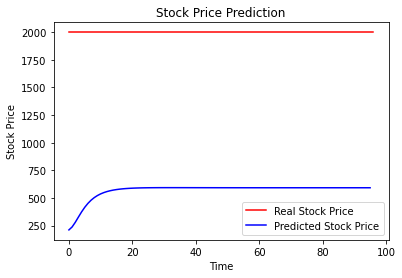

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
predictions= pd.DataFrame(predicted_stock_price, columns = ['prediction'])

In [ ]:
predictions.size

In [ ]:
predictions.to_csv (r'C:\Users\MarkCichonski\Learn ML 2021 Grand AI Challenge\results12.csv', index = False, header=True)

In [ ]:
#https://www.datacamp.com/community/tutorials/lstm-python-stock-market
#https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/
#https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
#https://keras.io/api/optimizers/adamax/
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/